In [1]:
#Usual importing to start
import xgboost as xgb
from astropy.io import fits
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

#Open the data
hdul = fits.open('QSO_complete.fits')
data = hdul[1].data
hdul.close()

In [2]:
#Make the colors
g = np.vstack(data['phot_g_mean_mag']+data['gPSFMag'])/2
b_minus_g = np.vstack(data['phot_bp_mean_mag'])-g
g_minus_r = g-np.vstack(data['phot_rp_mean_mag']+data['rPSFMag'])/2
r_minus_i = np.vstack(data['phot_rp_mean_mag']+data['rPSFMag'])/2-np.vstack(data['iPSFMag'])
i_minus_y = np.vstack(data['iPSFMag'])-np.vstack(data['yPSFMag'])
y_minus_w1 = np.vstack(data['yPSFMag'])-np.vstack(data['w1mpro'])
w1_minus_w2 = np.vstack(data['w1mpro'])-np.vstack(data['w2mpro'])
w2_minus_w3 = np.vstack(data['w2mpro'])-np.vstack(data['w3mpro'])
w3_minus_w4 = np.vstack(data['w3mpro'])-np.vstack(data['w4mpro'])

#Put together the data
X = np.concatenate((g,b_minus_g,g_minus_r,r_minus_i,i_minus_y,y_minus_w1,w1_minus_w2,w2_minus_w3,w3_minus_w4),axis = 1)
y = data['z_spec']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
X_train = np.vstack(X_train)
Y_train = np.vstack(Y_train)
X_test = np.vstack(X_test)
Y_test = np.vstack(Y_test)

R^2: [0.90887544 0.9264039  0.90502401 0.90396068 0.86752011]


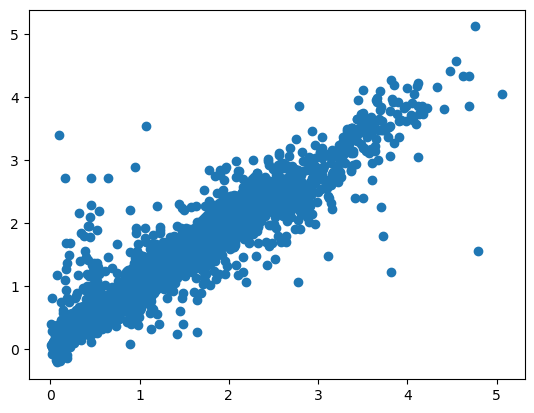

In [3]:
#Run the model
steps = 20  # The number of training iterations
model = xgb.XGBRegressor()
model.fit(X_train,Y_train)

#Plot predicted vs true
preds = model.predict(X_test)
plt.scatter(Y_test,preds)

#Cross validate to find R^2
scores = cross_val_score(model, X, y, scoring='r2', n_jobs=-1)
print('R^2:',scores)
